In [1]:
import ROOT
import ctypes

Welcome to JupyROOT 6.26/04


In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


In [8]:


sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_antiKstar/standard.root")
signal_1ab_tree = sig_1ab_file.Get("antiKstar")


In [15]:
# # D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.67,2.06)
# # D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.72,1.92)
D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.68, 2.05)
# # D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.67, 1.9)

D0_cosHel_TH1F = ROOT.TH1F("D0_cosHel_TH1F","D0_cosHel",40, -1, 1)


Warning in <TFile::Append>: Replacing existing TH1: D0_cosHel_TH1F (Potential memory leak).


In [10]:
def extract_histo(tree, histogram):
    for event in tree:
        histogram.Fill(event.D0_M)
    return histogram

In [11]:
def extract_hist_coshel(tree, histogram):
    for event in tree:
        if (event.iCascDcyBrP_Dst_0 !=0  ) and event.D0_M > 1.68  and event.D0_M < 2.05 and event.dM_pi0_75MeV > 0.022:

            histogram.Fill(event.D0_cosHel_0)
    return histogram

In [13]:
def extract_signals(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        # if event.iCascDcyBrP_Dst_0 ==63 and event.D0_M > 1.67 and event.D0_M < 2.06:
        # if (event.iCascDcyBrP_Dst_0 !=0 and event.iCascDcyBrP_Dst_0 !=1) and event.D0_M > 1.67 and event.D0_M < 2.06 and event.Belle2Pi0Veto_75MeV > 0.02:

        if (event.iCascDcyBrP_Dst_0 !=0  ) and event.D0_M > 1.68  and event.D0_M < 2.05 and event.dM_pi0_75MeV > 0.022:
        # if (event.iCascDcyBrP_Dst_0 !=0 and event.iCascDcyBrP_Dst_0 !=1 ) and event.D0_M > 1.67 and event.D0_M < 2.06 and event.Belle2Pi0Veto_75MeV > 0.02:

            histogram.Fill(event.D0_M)
    return histogram

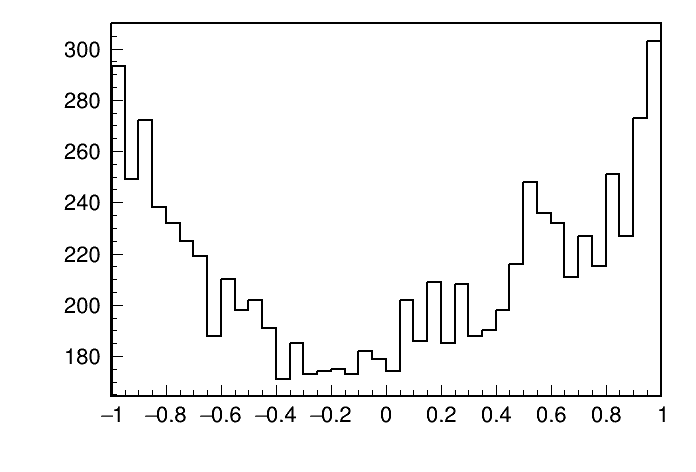

In [12]:

D0_cosHel_TH1F = extract_hist_coshel(signal_1ab_tree, D0_cosHel_TH1F)
c1 = ROOT.TCanvas()
D0_cosHel_TH1F.Draw()
c1.Draw()

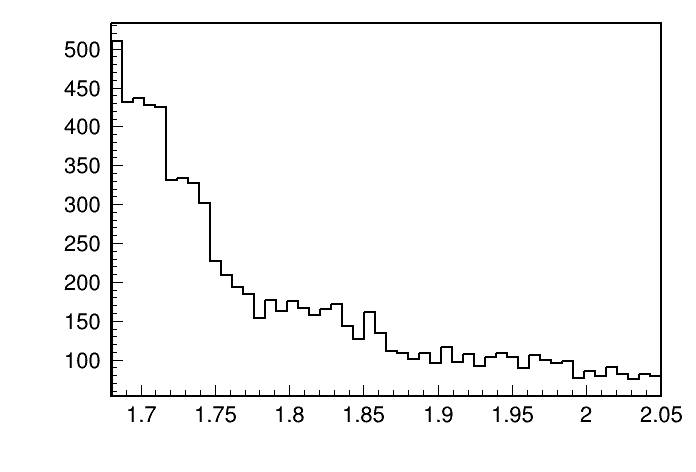

In [16]:

D0_M_TH1F_2 = extract_signals(signal_1ab_tree, D0_M_TH1F_2)
# D0_M_TH1F_2 = apply_cuts(signal_1ab_tree, D0_M_TH1F_2)

c1 = ROOT.TCanvas()
D0_M_TH1F_2.Draw()
c1.Draw()

In [40]:

# D0_M_TH1F_2 = extract_signals(signal_1ab_tree, D0_M_TH1F_2)
# # D0_M_TH1F_2 = apply_cuts(signal_1ab_tree, D0_M_TH1F_2)

# c1 = ROOT.TCanvas()
# D0_M_TH1F_2.Draw()
# c1.Draw()

In [41]:

# scale_factor = D0_M_TH1F_2.GetEntries()/D0_M_TH1F.GetEntries()

In [42]:
# scale_factor

In [39]:
#file_list = ['/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_antiKstar_*.root']
file_list = ["/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_antiKstar/standard.root"]


In [40]:
mychain = ROOT.TChain("antiKstar")
# mychain = ROOT.TChain("phi_cc")

for i in file_list:
    mychain.Add(i)

In [41]:
yrange = (-1, 1)

x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", 1.68, 2.05, "")
y = ROOT.RooRealVar("D0_cosHel_0", "cos#theta_{H}", yrange[0], yrange[1], "")
# z = ROOT.RooRealVar("Belle2Pi0Veto_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")
z = ROOT.RooRealVar("dM_pi0_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")
a = ROOT.RooRealVar("iCascDcyBrP_Dst_0", "",0,10000, "")

# a = iCascDcyBrP_Dst_0

# data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
before_data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z, a), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 & iCascDcyBrP_Dst_0 !=0  ")


w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)
w_1.setVal(1)
before_data.addColumn(w_1)
data1 = ROOT.RooDataSet(before_data.GetName(), before_data.GetTitle(),before_data, before_data.get(), '' ,  'w_1')
N_total = data1.sumEntries()
print(N_total)

7785.0
[#1] INFO:InputArguments -- The formula  D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 & iCascDcyBrP_Dst_0 !=0   claims to use the variables (D0_M,D0_cosHel_0,dM_pi0_75MeV,iCascDcyBrP_Dst_0) but only (D0_M,dM_pi0_75MeV,iCascDcyBrP_Dst_0) seem to be in use.
  inputs:          D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 & iCascDcyBrP_Dst_0 !=0  
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(iCascDcyBrP_Dst_0) TTree Int_t branch iCascDcyBrP_Dst_0 will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #25 because iCascDcyBrP_Dst_0 cannot accommodate the value -1
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #100 because iCascDcyBrP_Dst_0 cannot accommodate the value -1
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #107 because iCascDcyBrP_Dst_0 cannot accommodate the value -1
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #138 beca

In [42]:
#file_list = ['/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_antiKstar_*.root']
file_list = ["/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_antiKstar_cc/standard.root"]


In [43]:
mychain2 = ROOT.TChain("antiKstar_cc")
# mychain = ROOT.TChain("phi_cc")

for i in file_list:
    mychain2.Add(i)

In [44]:

# a = iCascDcyBrP_Dst_0
b = ROOT.RooRealVar("iCascDcyBrP_Dstm_0", "",0,10000, "")

# data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
before_data2 = ROOT.RooDataSet("data2","", ROOT.RooArgSet(x,y,z,b), ROOT.RooFit.Import(mychain2), Cut=" D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 & iCascDcyBrP_Dstm_0!=0 ")


# w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)
# w_1.setVal(1) 
before_data2.addColumn(w_1)
data2 = ROOT.RooDataSet(before_data2.GetName(), before_data2.GetTitle(),before_data2, before_data2.get(), '' ,  'w_1')
N_total = data2.sumEntries()
print(N_total)

7118.0
[#1] INFO:InputArguments -- The formula  D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 & iCascDcyBrP_Dstm_0!=0  claims to use the variables (D0_M,D0_cosHel_0,dM_pi0_75MeV,iCascDcyBrP_Dstm_0) but only (D0_M,dM_pi0_75MeV,iCascDcyBrP_Dstm_0) seem to be in use.
  inputs:          D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 & iCascDcyBrP_Dstm_0!=0 
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(iCascDcyBrP_Dstm_0) TTree Int_t branch iCascDcyBrP_Dstm_0 will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping event #211 because iCascDcyBrP_Dstm_0 cannot accommodate the value -1
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping event #227 because iCascDcyBrP_Dstm_0 cannot accommodate the value -1
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping event #238 because iCascDcyBrP_Dstm_0 cannot accommodate the value -1
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping event

In [45]:
data1.append(data2)

In [46]:
data1

In [47]:
data1.sumEntries()

14903.0

In [48]:
#file_list = ['/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_antiKstar_*.root']
file_list = ["/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/uubar/*.root", \
            "/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/ddbar/*.root", \
            "/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/ssbar/*.root", \
            "/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/charged/*.root", \
            "/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/mixed/*.root", \
            "/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/taupair/*.root"]
        


In [49]:
mychain3 = ROOT.TChain("antiKstar")
# mychain = ROOT.TChain("phi_cc")

for i in file_list:
    mychain3.Add(i)

In [50]:

# a = iCascDcyBrP_Dst_0

# data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
before_data3 = ROOT.RooDataSet("data3","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain3), Cut=" D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022  ")


# w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)
# w_1.setVal(1) 
before_data3.addColumn(w_1)
data3 = ROOT.RooDataSet(before_data3.GetName(), before_data3.GetTitle(),before_data3, before_data3.get(), '' ,  'w_1')
N_total = data3.sumEntries()
print(N_total)

1499.0
[#1] INFO:InputArguments -- The formula  D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022   claims to use the variables (D0_M,D0_cosHel_0,dM_pi0_75MeV) but only (D0_M,dM_pi0_75MeV) seem to be in use.
  inputs:          D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022  
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data3) Skipping event #2 because D0_M cannot accommodate the value 1.66364
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data3) Skipping event #12 because D0_M cannot accommodate the value 1.63975
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data3) Skipping event #14 because D0_M cannot accommodate the value 1.64124
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data3) Skipping event #17 because D0_M cannot accommodate the value 2.08091
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data3) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data3) Ignored 767 out-of-range events


In [51]:
data1.append(data3)

In [52]:
data1.sumEntries()

16402.0

In [53]:
#file_list = ['/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_antiKstar_*.root']
file_list = ["/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/uubar/*.root", \
            "/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/ddbar/*.root", \
            "/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/ssbar/*.root", \
            "/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/charged/*.root", \
            "/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/mixed/*.root", \
            "/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/taupair/*.root"]
        


In [54]:
mychain4 = ROOT.TChain("antiKstar_cc")
# mychain = ROOT.TChain("phi_cc")

for i in file_list:
    mychain4.Add(i)

In [55]:

# a = iCascDcyBrP_Dst_0

# data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
before_data4 = ROOT.RooDataSet("data4","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain4), Cut=" D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022  ")


# w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)
# w_1.setVal(1) 
before_data4.addColumn(w_1)
data4 = ROOT.RooDataSet(before_data4.GetName(), before_data4.GetTitle(),before_data4, before_data4.get(), '' ,  'w_1')
N_total = data4.sumEntries()
print(N_total)

1297.0
[#1] INFO:InputArguments -- The formula  D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022   claims to use the variables (D0_M,D0_cosHel_0,dM_pi0_75MeV) but only (D0_M,dM_pi0_75MeV) seem to be in use.
  inputs:          D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022  
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data4) Skipping event #10 because D0_M cannot accommodate the value 1.65246
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data4) Skipping event #12 because D0_M cannot accommodate the value 1.64276
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data4) Skipping event #13 because D0_M cannot accommodate the value 1.64664
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data4) Skipping event #25 because D0_M cannot accommodate the value 1.66686
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data4) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data4) Ignored 637 out-of-range events


In [56]:
data1.append(data4)

In [57]:
data1.sumEntries()

17699.0

In [58]:
fitting_region = (1.68, 2.05)
# x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# # x.setBins(40)
# l = ROOT.RooArgList(x)
# # signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F_2, 1)


In [59]:

mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.6,1.4, 1.7)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,0.5)
# sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.02,0,0.5)
# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,2)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 5,0,10)

x_bkg2_c0 = ROOT.RooRealVar("x_bkg2_c0", "c0",0.2, -1,1)
x_bkg2_c1 = ROOT.RooRealVar("x_bkg2_c1", "c1",0.2, -1,1)

# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = RO
# ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


x_bkg3_tau = ROOT.RooRealVar("x_bkg3_tau", "tau",-2, -20,0)


[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.5] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(D0_M) new range named 'fit' created with bounds [1.68,2.05]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(D0_M) new range named 'NormalizationRangeForfit' created with bounds [1.68,2.05]
[#1] INFO:Eval -- RooRealVar::setRange(D0_M) new range named 'fit_nll_model_data' created with bounds [1.68,2.05]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization --  The following expressions wi

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/antiKstargamma/antiKstar_massveto_1ab_remain.png has been created


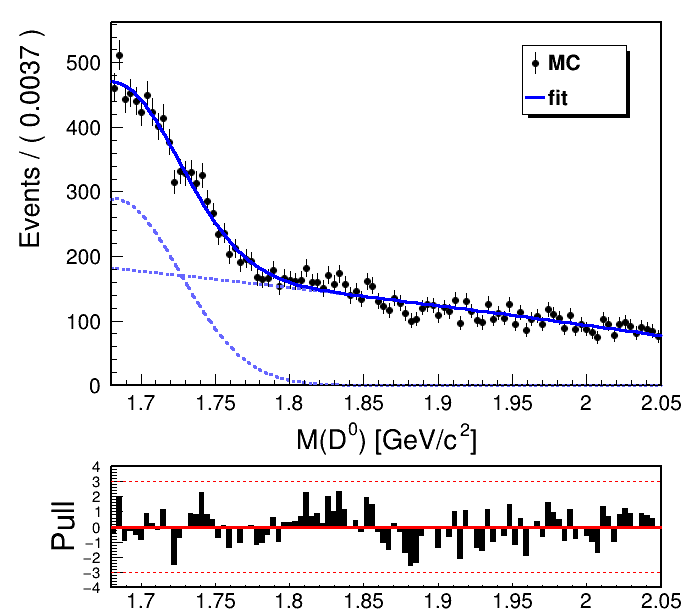

In [60]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
# # sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# # # sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)


# sig2 = ROOT.RooExponential("sig2", "Signal component 1", x, x_bkg3_tau) 

sig2 = ROOT.RooPolynomial("sig2", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))
sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)


# # model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)
model = ROOT.RooAddPdf("model", "model", [sig1, sig2], sig1frac)

# model = ROOT.RooPolynomial("model", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))


r = model.fitTo(data1,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)

r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data1.plotOn(frame,Name = "data1", XErrorSize=0)

model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
# leg1.SetBorderSize(0)

leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/antiKstargamma/antiKstar_massveto_1ab_remain.png")
#canv.SaveAs("test.png")

f = ROOT.TFile("antiKstarg_remain_fitresult.root", "RECREATE")
r.Write("antiKstarg")
f.Close()


In [61]:
model.Print("t")

0x556b0c5e2380 RooAddPdf::model = 0.437484 [Auto,Dirty] 
  0x556b36a326a0/V- RooGaussian::sig1 = 0.000179764 [Auto,Dirty] 
    0x556b200316e0/V- RooRealVar::D0_M = 1.865
    0x556b10866490/V- RooRealVar::mean = 1.68197 +/- 0.00611908
    0x556b0ed40220/V- RooRealVar::sigma1 = 0.0440704 +/- 0.0038591
  0x556b2b33fc40/V- RooRealVar::sig1frac = 0.252741 +/- 0.00963496
  0x556b0d001640/V- RooPolynomial::sig2 = 0.58539 [Auto,Dirty] 
    0x556b200316e0/V- RooRealVar::D0_M = 1.865
    0x556b0c9d79b0/V- RooRealVar::x_bkg2_c0 = 0.795284 +/- 0.23335
    0x556b00c24ab0/V- RooRealVar::x_bkg2_c1 = -0.545627 +/- 0.106092


In [87]:
f = ROOT.TFile.Open("antiKstarg_remain_fitresult.root")
r2 = ROOT.gDirectory.Get("antiKstarg")
f.Close()


In [88]:
r2.Print()


  RooFitResult: minimized FCN value: -17845, estimated distance to minimum: 0.00012943
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                  mean    1.6885e+00 +/-  4.23e-03
              sig1frac    2.2998e-01 +/-  1.20e-02
                sigma1    3.6865e-02 +/-  2.86e-03
             x_bkg2_c0   -9.3609e-01 +/-  1.08e-02
             x_bkg2_c1    2.2294e-01 +/-  4.91e-03



In [50]:
r2.correlation("x_bkg2_c0","x_bkg2_c1")

0.0

[#0] ERROR:InputArguments -- RooFitResult::correlation(fitresult_model_sighist) parameter x_bkg2_c0 is not a floating fit parameter


In [51]:
r2.edm()

2.54437789718335e-05

In [52]:
r2.correlationMatrix()

<cppyy.gbl.TMatrixTSym<double> object at 0x55bf9b72a850>

# cosHel

In [62]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared", "x,c0", "", "c0*x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared.cxx+")

93918404083424

(MyPdf_xsquared) An instance of MyPdf_xsquared.


In [63]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
# ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")

In [64]:
fitting_region = (-1, 1)
# y = ROOT.RooRealVar("cos#theta_{H}", "cos#theta_{H}", fitting_region[0], fitting_region[1], "")
# y.setBins(50)
# y_l = ROOT.RooArgList(y)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
# y_signalhist = ROOT.RooDataHist("y_signalhist", "sighist", y_l, D0_cosHel_TH1F, 1)


In [65]:
y_mean = ROOT.RooRealVar("y_mean", "mean of gaussians", 0.5,0.4, 0.6)
y_sigma1 = ROOT.RooRealVar("y_sigma1", "width of gaussians", 0.03,0,0.2)
y_sigma2 = ROOT.RooRealVar("y_sigma2", "width of gaussians", 0.02,0,0.2)

c0 = ROOT.RooRealVar("c0", "c0",0.2, 0,1)


Cheby_c0 = ROOT.RooRealVar("Cheby_c0", "c0",0.2, -1,1)
Cheby_c1 = ROOT.RooRealVar("Cheby_c1", "c0",0.2, -1,1)
Cheby_c2 = ROOT.RooRealVar("Cheby_c2", "c0",-0.2, -1,1)


[#0] WARNING:InputArguments -- The parameter 'y_sigma1' with range [0, 0.2] of the RooGaussian 'sig2_1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'y_sigma2' with range [0, 0.2] of the RooGaussian 'sig2_2' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) constructing test statistic for sub-range named fit
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization

  RooFitResult: minimized FCN value: 12130.7, estimated distance to minimum: 3.31469e-07
                covariance matr

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/antiKstargamma/antiKstar_massveto_1ab_remain_coshel.png has been created


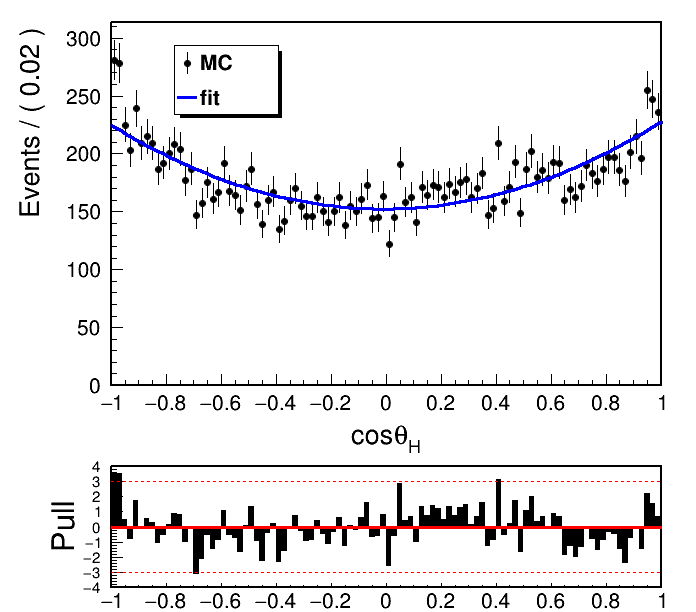

In [67]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))


# y_bkg1_model = ROOT.MyPdf_xsquared_nopara("y_bkg1_model", "y_bkg1", y)
# model = ROOT.MyPdf_xsquared_nopara("model", "y_bkg1", y)
# sig1 = ROOT.MyPdf_xsquared_nopara("sig1", "y_bkg1", y)
sig1 = ROOT.MyPdf_xsquared("sig1", "y_bkg1", y, c0)


sig2_1 = ROOT.RooGaussian("sig2_1", "Signal component 1", y, y_mean, y_sigma1)
sig2_2 = ROOT.RooGaussian("sig2_2", "Signal component 1", y, y_mean, y_sigma2)

frac2 = ROOT.RooRealVar("frac2", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig2 = ROOT.RooAddPdf("sig2", "model", [sig2_1, sig2_2], frac2)


sig3 = ROOT.RooChebychev("sig3", "Signal component 1", y, ROOT.RooArgList(Cheby_c0, Cheby_c1, Cheby_c2))

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)


# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

sig_model1 = ROOT.RooAddPdf("sig_model1", "model", [sig1, sig2], sig1frac)
# model = ROOT.RooAddPdf("model", "model", [sig3, sig_model1], sig2frac)


# model = ROOT.RooChebychev("model", "Signal component 1", y, ROOT.RooArgList(Cheby_c0, Cheby_c1, Cheby_c2))
model = ROOT.RooChebychev("model", "Signal component 1", y, ROOT.RooArgList(Cheby_c0, Cheby_c1))


run = model.fitTo(data1,NumCPU=12,Range=(-1,1),PrintLevel=-1, Save=1)
# run = model.fitTo(y_signalhist,NumCPU=12,Range=(-1,1),PrintLevel=-1)

run.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = y.frame(Title=" ")

data1.plotOn(frame,Name = "data1", XErrorSize=0)

# model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.25, 0.75, 0.4, 0.9)
# leg1.SetBorderSize(0)

leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = y.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/antiKstargamma/antiKstar_massveto_1ab_remain_coshel.png")

f = ROOT.TFile("antiKstarg_remain_fitresult_coshel.root", "RECREATE")
run.Write("antiKstarg")
f.Close()


In [68]:
model.Print("t")


0x556aff9f4b30 RooChebychev::model = 0.805342 [Auto,Dirty] 
  0x556b1ec93270/V- RooRealVar::D0_cosHel_0 = 0
  0x556b144b3260/V- RooRealVar::Cheby_c0 = 0.00715078 +/- 0.0127908
  0x556b132f3cc0/V- RooRealVar::Cheby_c1 = 0.194658 +/- 0.0111632


In [97]:
f = ROOT.TFile.Open("antiKstarg_remain_fitresult_coshel.root")
r2 = ROOT.gDirectory.Get("antiKstarg")
f.Close()


In [98]:
r2.Print()


  RooFitResult: minimized FCN value: 10203.2, estimated distance to minimum: 7.16672e-06
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
              Cheby_c0    7.8585e-03 +/-  1.65e-02
              Cheby_c1    1.9671e-01 +/-  1.22e-02
              Cheby_c2   -4.4074e-02 +/-  1.28e-02

